# A Gentle Introduction to Data Science with Python
Python is a capable and free (open source) programming language well-suited for analysis of data, including microbiome data. Together, we will go through a real-life example, re-analyzing microbiome - immune checkpoint inhibitor studies. We will touch on both the basics (loading in data, transforming, graphing, basic statistical analysis, and outputting data and figures), and use the examples to compare and contrast with some equivalents in R. This introduction should be suitable for those with no data analysis with code experience, but have some added dimensions for those familiar with R.


## `jupyter` (much like an R Markdown document) allows for markdown text, code, and the output from code to all be in the same document.

I used another feature of python to make this portable: `virtual environments`. Virtual environments are python environments kept seperate from those on the rest of your computer. In the environment can be a specific version of python and all the supporting libraries for a project. Need to go back and rerun an analysis? The virutal environment for a project can keep the data, code, _and_ packages for an analysis together and unchanged from when first run.


### Vanilla python has multiple useful data structures


In [1]:
# lists / arrays
L = [1, 2, 3, 4]

# dictionaries
D = {
    1: 'a', 
    2: 'b',
    3: 'c',
    4: 'd'
}
# sets
S = {
    1,
    2,
    3,
    4
}

print(
    L[2],
    D[3],
    5 in S
)


3 c False


### Python is organized with whitespace. 
- Spaces, tabs, and indentations in general are really important, and are how python scripts are organised

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4


In [3]:
import pandas as pd

### Python has a large number of libraries that can be imported
- `import` is the command to import a library.
- One nice feature of python is one can change the name of the library on import
- The parts of a library stay in the namespace of the package. 
#### `Pandas` is among the most useful of these for data analysis: The Python Data Analysis Library. 

In [4]:
metadata = pd.read_csv('data/metadata.csv')
metadata.head()

,Sample_ID,Publication_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
0,SRR6000888,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P29,NaN,NaN,R,NaN,16S_miseq_p,SRR6000888
1,SRR6000887,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P22,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000887
2,SRR6000897,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P40,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000897
3,SRR6000883,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P26,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000883
4,SRR6000882,Matson,Chicago,Melanoma,PD-1,16S,NaN,SRP116709,P25,NaN,NaN,NR,NaN,16S_miseq_p,SRR6000882


### pandas creates data frames
- These are akin to data frames in R
- These can be created from CSV, excel, TSV, and a multitude of other formats
- One can also make a dataframe directly from python code.

### Python dataframes have powerful methods to do things like group and summarize the data.
- count(), sum(), describe()

In [5]:
metadata.groupby('Publication_ID').count()

,Sample_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
Publication_ID,,,,,,,,,,,,,,
Chaput,83,83,83,83,83,0,83,83,83,83,83,83,83,83
Dubin,34,34,34,34,34,0,34,34,0,34,0,0,34,34
Matson,42,42,42,42,42,0,42,42,0,0,42,0,42,42


### DataFrames can be sliced to select for data that matches a condition
- In this case, specimens for which we have response data

In [6]:
metadata[
    ~metadata.ICI_Response.isna()
].groupby('Publication_ID').count()

,Sample_ID,Location,cancer_type,ICI_type,Sequencing_method,Seq_note,Project_ID,Subject_ID,Timepoint,Colitis,ICI_Response,ICI_Response_RECIST,data_type,specimen
Publication_ID,,,,,,,,,,,,,,
Chaput,83,83,83,83,83,0,83,83,83,83,83,83,83,83
Matson,42,42,42,42,42,0,42,42,0,0,42,0,42,42


#### We can also get _all_ the possible values for a column

In [7]:
metadata.Timepoint.unique()

array([nan, 'baseline', 'before ICI 3', 'before ICI 2', 'tox',
       'before ICI 4', 'end of ICI', 'post-tox'], dtype=object)

#### and fill missing values in a column very easily

In [8]:
metadata.Timepoint.fillna('baseline', inplace=True)
metadata.Timepoint.unique()

array(['baseline', 'before ICI 3', 'before ICI 2', 'tox', 'before ICI 4',
       'end of ICI', 'post-tox'], dtype=object)

### Let's see if baseline alpha diversity varied by response or non-response in each trial
- Pandas can directly read in gzipped data without issue


In [9]:
# Load in the alpha diversity data 
alpha_diversity = pd.read_csv('data/alpha_diversity.csv.gz')
alpha_diversity.head()

,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5
0,wgs__SRR6000949,3.41531,1.36426,26.9724,27.3329,3.44274,12.48660,0.000000,4.75985,2.65419,2.00188,1.69356,1.51998
1,wgs__SRR6000947,3.67516,1.38211,33.2994,33.6599,3.42520,15.35990,inf,5.34982,2.70777,1.99378,1.68398,1.51448
2,wgs__SRR6000946,4.07237,1.51638,29.0650,29.0650,3.62707,13.24060,0.000000,6.39275,3.23404,2.22731,1.81212,1.59887
3,wgs__SRR6000944,3.05071,1.26369,23.3397,23.3397,3.42116,11.29600,inf,4.37751,2.57469,2.01532,1.73131,1.55971
4,wgs__SRR6000943,3.71150,1.52155,19.9175,20.2780,3.78097,9.00839,0.444244,5.20077,3.08585,2.19424,1.78275,1.56581


#### We can create new columns by modifying old columns


In [10]:
alpha_diversity['Sample_ID'] = alpha_diversity.placerun.apply(lambda p: p.split("__")[1])
alpha_diversity.head()

,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5,Sample_ID
0,wgs__SRR6000949,3.41531,1.36426,26.9724,27.3329,3.44274,12.48660,0.000000,4.75985,2.65419,2.00188,1.69356,1.51998,SRR6000949
1,wgs__SRR6000947,3.67516,1.38211,33.2994,33.6599,3.42520,15.35990,inf,5.34982,2.70777,1.99378,1.68398,1.51448,SRR6000947
2,wgs__SRR6000946,4.07237,1.51638,29.0650,29.0650,3.62707,13.24060,0.000000,6.39275,3.23404,2.22731,1.81212,1.59887,SRR6000946
3,wgs__SRR6000944,3.05071,1.26369,23.3397,23.3397,3.42116,11.29600,inf,4.37751,2.57469,2.01532,1.73131,1.55971,SRR6000944
4,wgs__SRR6000943,3.71150,1.52155,19.9175,20.2780,3.78097,9.00839,0.444244,5.20077,3.08585,2.19424,1.78275,1.56581,SRR6000943


### The combination of slicing and selecting columns can efficiently simplify complex dataframes to just what is needed for a question

In [11]:
# Pare down our metadata to just what we need
response_metadata = metadata[
    ~metadata.ICI_Response.isna() &
    (metadata.Timepoint == 'baseline')
][[
    'Publication_ID',
    'Sample_ID',
    'ICI_Response',

]].drop_duplicates()

response_metadata.head()


,Publication_ID,Sample_ID,ICI_Response
0,Matson,SRR6000888,R
1,Matson,SRR6000887,NR
2,Matson,SRR6000897,NR
3,Matson,SRR6000883,NR
4,Matson,SRR6000882,NR


### Pandas can very efficiently merge together dataframes, matching on columns or the index
- This is very akin to an SQL JOIN

In [12]:
response_ad = pd.merge(
    response_metadata,
    alpha_diversity,
    on='Sample_ID',
    how='left'
)

response_ad.head()


,Publication_ID,Sample_ID,ICI_Response,placerun,phylo_entropy,quadratic,unrooted_pd,rooted_pd,bwpd,rooted_qd_0,rooted_qd_1,rooted_qd_1.00001,rooted_qd_2,rooted_qd_3,rooted_qd_4,rooted_qd_5
0,Matson,SRR6000888,R,16s__SRR6000888,2.97914,1.18380,18.0552,18.4157,2.86628,9.37864,0.0,4.55940,2.51811,1.86687,1.59380,1.44927
1,Matson,SRR6000887,NR,16s__SRR6000887,2.43453,1.10099,10.1266,10.4871,2.76146,5.20900,0.0,3.35094,2.20685,1.72022,1.49902,1.38014
2,Matson,SRR6000897,NR,16s__SRR6000897,3.85681,1.45508,25.5293,25.8898,3.45654,11.82560,inf,5.82206,2.98181,2.07909,1.71347,1.52589
3,Matson,SRR6000883,NR,16s__SRR6000883,3.60791,1.48953,19.4445,19.8050,3.66557,8.67830,inf,4.85948,2.87929,2.09376,1.73498,1.54282
4,Matson,SRR6000882,NR,16s__SRR6000882,2.96983,1.13609,19.9858,20.3463,2.68763,10.51950,inf,4.64346,2.42357,1.78834,1.53668,1.40750


## Seaborn is an advanced python graphing library
- Again, we import with `as` to make the name shorter given how often we use it
- matplotlib is the (still powerful but) basic graphing library for python, inspired by graphing in MATLAB


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Publication_ID', ylabel='quadratic'>

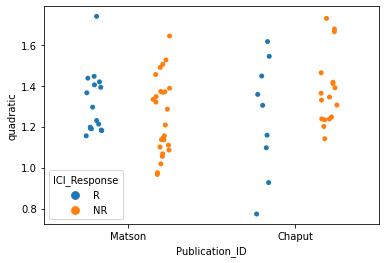

In [14]:
sns.stripplot(
    data=response_ad,
    x='Publication_ID',
    y='quadratic',
    hue='ICI_Response',
    dodge=True
)

### Pandas has extremely powerful methods to convert from wide to long (and vice versa)

In [15]:
# Melt converts to long
response_ad_long = response_ad.melt(
    id_vars=[
        'Publication_ID',
        'Sample_ID',
        'ICI_Response',
    ],
    value_vars=[
        'phylo_entropy',
        'quadratic',
        'unrooted_pd',
        'rooted_pd',
        'bwpd',
        'rooted_qd_1.00001',
        'rooted_qd_2'
    ]
)
response_ad_long.head()

,Publication_ID,Sample_ID,ICI_Response,variable,value
0,Matson,SRR6000888,R,phylo_entropy,2.97914
1,Matson,SRR6000887,NR,phylo_entropy,2.43453
2,Matson,SRR6000897,NR,phylo_entropy,3.85681
3,Matson,SRR6000883,NR,phylo_entropy,3.60791
4,Matson,SRR6000882,NR,phylo_entropy,2.96983


### Seaborn works particularly well with data in long format and can quickly plot all the permutations

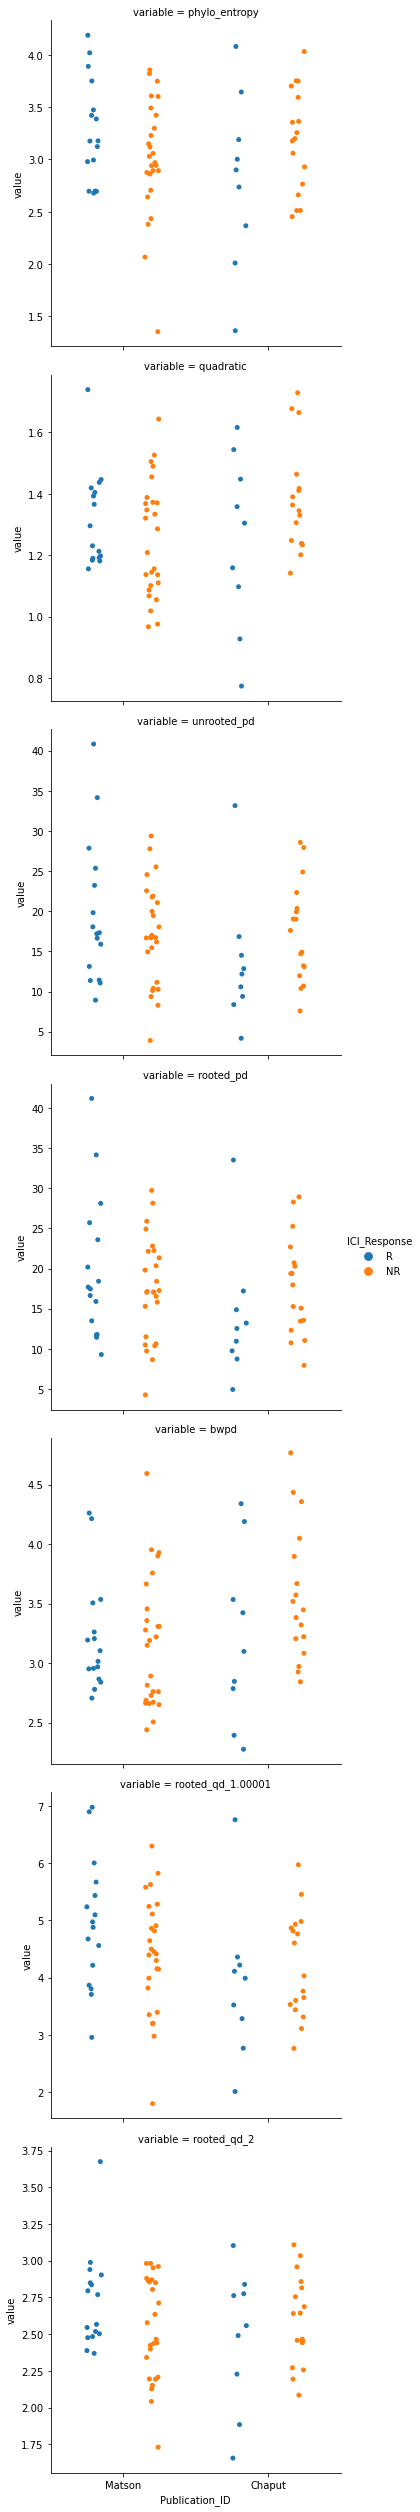

In [16]:
sns.catplot(
    data=response_ad_long,
    x='Publication_ID',
    y='value',
    hue='ICI_Response',
    dodge=True,
    kind='strip',
    row='variable',
    sharey=False
)

### Python also has very good (if a bit less cutting edge than R) statistical and machine learning libraries.
- statsmodels has a formula syntax borrowed from R

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

In [18]:
response_ad_long['ICI_Response_TF'] = response_ad_long.ICI_Response.apply(lambda v: 1 if v=='R' else 0)
response_ad_long.head()

,Publication_ID,Sample_ID,ICI_Response,variable,value,ICI_Response_TF
0,Matson,SRR6000888,R,phylo_entropy,2.97914,1
1,Matson,SRR6000887,NR,phylo_entropy,2.43453,0
2,Matson,SRR6000897,NR,phylo_entropy,3.85681,0
3,Matson,SRR6000883,NR,phylo_entropy,3.60791,0
4,Matson,SRR6000882,NR,phylo_entropy,2.96983,0


In [19]:
logit_model = smf.logit(
    "ICI_Response_TF ~ value",
    data=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001')
    ]
).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.633822
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        ICI_Response_TF   No. Observations:                   26
Model:                          Logit   Df Residuals:                       24
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                 0.01738
Time:                        16:25:20   Log-Likelihood:                -16.479
converged:                       True   LL-Null:                       -16.771
Covariance Type:            nonrobust   LLR p-value:                    0.4451
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6412      1.744      0.368      0.713      -2.776       4.059
value         -0.3157      0.424     -0.744      0.457      -1.147       0.516
==============================================================================
"""

In [20]:
from scipy.stats import ttest_ind

In [21]:
ttest_ind(
    a=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001') &
        (response_ad_long.ICI_Response == 'R')
    ].value,
    b=response_ad_long[
        (response_ad_long.Publication_ID == 'Chaput') &
        (response_ad_long.variable == 'rooted_qd_1.00001') &
        (response_ad_long.ICI_Response == 'NR')
    ].value
)

Ttest_indResult(statistic=-0.7316085898000334, pvalue=0.47149134131420956)